# DBScan

density based algorithm

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler


# Load the Data

In [3]:
df = pd.read_csv("../datasets/data.csv")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Plot Some Data

Text(0, 0.5, 'Income')

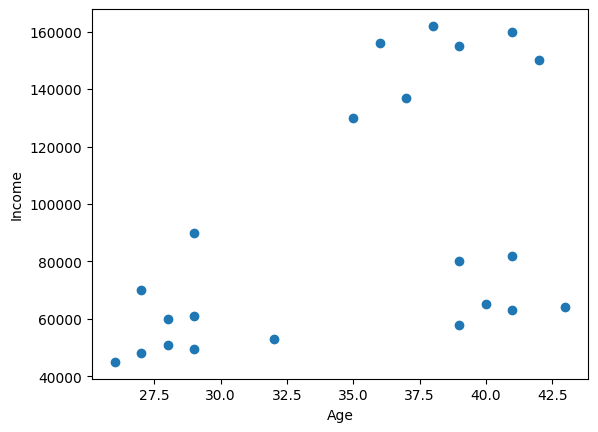

In [4]:
plt.scatter(df["Age"], df["Income"])
plt.xlabel("Age")
plt.ylabel("Income")

# Normalize the Data

In [5]:
# create the scaler

scaler = MinMaxScaler(feature_range=(0,1))

# Scale the age
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])


# Scale the income
scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])




df.head(25)

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


# Build and Train the model

In [12]:
model = DBSCAN(eps= 0.2, min_samples= 5)

y_predicted = model.fit_predict(df[["Age", "Income"]])


# Attach the cluster column to df 
df["cluster"] = y_predicted 

df.sort_values("cluster", inplace= True)

df.head(10)

,Name,Age,Income,cluster
1,Michael,0.176471,0.384615,-1
9,Angelina,0.529412,0.726496,-1
0,Rob,0.058824,0.213675,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
15,Ranbir,0.352941,0.068376,0
14,Stark,0.176471,0.038462,0
13,Jared,0.117647,0.051282,0
12,Arnold,0.058824,0.025641,0
11,Tom,0.000000,0.000000,0


# Plot the clusters

<Axes: xlabel='Age', ylabel='Income'>

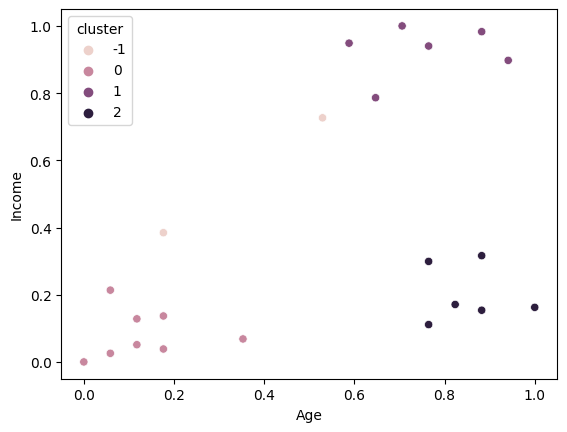

In [13]:
sn.scatterplot(x = df["Age"], y = df["Income"], hue = df["cluster"])